# Hyperparameter optimisation

## Grid search

This involves goining though a fixed grid of hyperparameters.

Let's load the UCI adult dataset and the test set.

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

train = pd.read_csv('adult.data', header=None, na_values=' ?')
test = pd.read_csv('adult.test', header=None,  na_values=' ?', skiprows=1)
test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.


In [ ]:
categorical_vars = [1, 3, 5, 6, 7, 8, 9, 13, 14]
labelencoder = preprocessing.LabelEncoder()
for var in categorical_vars:
    train[var] = labelencoder.fit_transform(train[var])
    test[var] = labelencoder.transform(test[var])


Let's check for missing values.

In [46]:
train.isna().sum()

0        0
1     1836
2        0
3        0
4        0
5        0
6     1843
7        0
8        0
9        0
10       0
11       0
12       0
13     583
14       0
dtype: int64

In [47]:
test.isna().sum()

0       0
1     963
2       0
3       0
4       0
5       0
6     966
7       0
8       0
9       0
10      0
11      0
12      0
13    274
14      0
dtype: int64

In [48]:
train=train.dropna()
test=test.dropna()

In [49]:
train.shape

(30162, 15)

In [50]:
categorical_vars = [1, 3, 5, 6, 7, 8, 9, 13, 14]
cat_columns = train.iloc[:,categorical_vars].astype('category').columns
train_le = train
test_le = test
train_le[cat_columns] = train[cat_columns].astype('category').apply(lambda x: x.cat.codes)
test_le[cat_columns] = test[cat_columns].astype('category').apply(lambda x: x.cat.codes)
train_le.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0


In [54]:
train[cat_columns].astype('category').apply(lambda x: x.cat.codes)

,1,3,5,6,7,8,9,13,14
0,5,9,4,0,1,4,1,38,0
1,4,9,2,3,0,4,1,38,0
2,2,11,0,5,1,4,1,38,0
3,2,1,2,5,0,2,1,38,0
4,2,9,2,9,5,2,0,4,0
...,...,...,...,...,...,...,...,...,...
32556,2,7,2,12,5,4,0,38,0
32557,2,11,2,6,0,4,1,38,1
32558,2,11,6,0,4,4,0,38,0
32559,2,11,4,0,3,4,1,38,0


In [44]:
categorical_vars = [1, 3, 5, 6, 7, 8, 9, 13, 14]
labelencoder = preprocessing.LabelEncoder()
for var in categorical_vars:
    train[var] = labelencoder.fit_transform(train[var])
    test[var] = labelencoder.transform(test[var])


In [38]:
train_le[0].iloc[1]

50

In [15]:
from sklearn import preprocessing

In [16]:
le = preprocessing.LabelEncoder()
train_encode = train.copy()
test_encode = test.copy()
train_encode[categorical_vars] = train_encode[categorical_vars].apply(le.fit_transform)
test_encode[categorical_vars] = test_encode[categorical_vars].apply(le.fit_transform)


In [24]:
traiN_

array([38,  4, 22, 18, 25, 32, 15,  8,  1, 10, 19, 29, 30,  3,  0, 36,  6,
       24, 35, 13, 31,  5,  7,  9, 12, 21,  2, 34, 23, 40, 28, 27, 33, 37,
       11, 26, 39, 16, 20, 17, 14], dtype=int64)

In [18]:
test_encode[0]

0        25
1        38
2        28
3        44
5        34
         ..
16275    33
16276    39
16278    38
16279    44
16280    35
Name: 0, Length: 15060, dtype: int64

array([[<AxesSubplot:title={'center':'14'}>]], dtype=object)

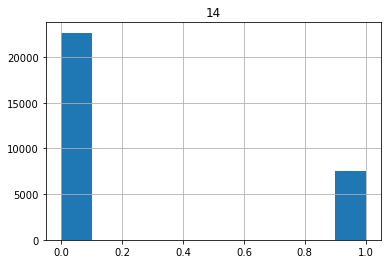

In [9]:
train_le.hist(14)

In [10]:
train_le.shape

(30162, 15)

In [11]:
train_arr = train_le.to_numpy()
test_arr = test_le.to_numpy()
train_x, train_y = train_arr[:10000, :-1], train_arr[:10000, -1].astype(np.int32)
val_x, val_y = train_arr[10000:15000, :-1], train_arr[10000:15000, -1].astype(np.int32)
test_x, test_y = test_arr[:, :-1], test_arr[:,-1]

In [13]:
from sklearn.ensemble import RandomForestClassifier
n_ests = [10, 20, 40, 100, 200, 500]
val_accs = []
for n in n_ests:
    clf = RandomForestClassifier(n_estimators = n, max_depth=2, random_state=0)
    clf.fit(train_x, train_y)
    val_accs.append(clf.score(val_x, val_y))
best_n_ests = n_ests[np.argmax(val_accs)]

In [14]:
val_accs

[0.7738, 0.7778, 0.7874, 0.7854, 0.7902, 0.7858]

In [15]:
clf = RandomForestClassifier(n_estimators = best_n_ests, max_depth=2, random_state=0)
clf.fit(train_x, train_y)
clf.score(val_x, val_y)

0.7902

## Random search

In [23]:
# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})"
                  .format(results['mean_test_score'][candidate],
                          results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [37]:
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats
from time import time

# specify parameters and distributions to sample from
param_dist = {'n_estimators': list(range(10,2000))}

# run randomized search
clf = RandomForestClassifier(max_depth=2, random_state=0)
n_iter_search = 10
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search)

start = time()
random_search.fit(np.vstack([train_x, val_x]), np.hstack([train_y, val_y]), np.array([0]*10000 + [1]*5000))
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

/Users/samuelKessler/anaconda3/envs/tf2/lib/python3.6/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass groups=[0 0 0 ... 1 1 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


RandomizedSearchCV took 227.11 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.794 (std: 0.003)
Parameters: {'n_estimators': 846}

Model with rank: 2
Mean validation score: 0.794 (std: 0.003)
Parameters: {'n_estimators': 1709}

Model with rank: 3
Mean validation score: 0.794 (std: 0.002)
Parameters: {'n_estimators': 1101}



In [38]:
clf = RandomForestClassifier(n_estimators = 744, max_depth=2, random_state=0)
clf.fit(train_x, train_y)
clf.score(test_x, test_y)

0.7895086321381142

## Bayesian optimisation

This shows the target function which we want to optimise.

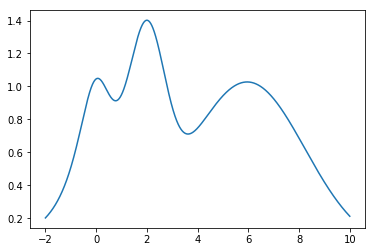

In [26]:
from bayes_opt import BayesianOptimization
np.random.seed(42)
xs = np.linspace(-2, 10, 10000)

def f(x):
    return np.exp(-(x - 2) ** 2) + np.exp(-(x - 6) ** 2 / 10) + 1/ (x ** 2 + 1)

plt.plot(xs, f(xs))
plt.show()

Kappa contols the degree of exploration in the 'upper confidence bound' exploration-exploitation regime.

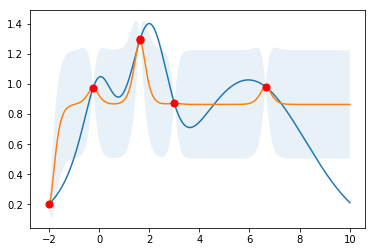

In [58]:
def plot_bo(f, bo):
    x = np.linspace(-2, 10, 10000)
    mean, sigma = bo._gp.predict(x.reshape(-1, 1), return_std=True)
    
    plt.plot(x, f(x))
    plt.plot(x, mean)
    plt.fill_between(x, mean + sigma, mean - sigma, alpha=0.1)
    plt.scatter(bo.space.params.flatten(), bo.space.target, c="red", s=50, zorder=10)
    plt.show()
    
bo = BayesianOptimization(
    f=f,
    pbounds={"x": (-2, 10)},
    verbose=0,
    random_state=1,
)

bo.maximize(n_iter=1, acq="ucb", kappa=0.1)

plot_bo(f, bo)

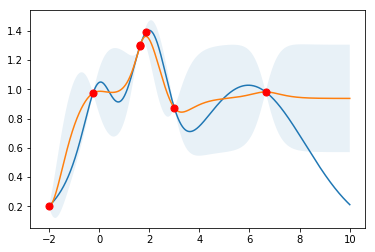

In [56]:
bo = BayesianOptimization(
    f=f,
    pbounds={"x": (-2, 10)},
    verbose=0,
    random_state=1,
)
bo.maximize(n_iter=2, acq="ucb", kappa=0.1)

plot_bo(f, bo)

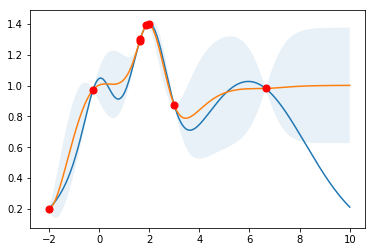

In [59]:
bo = BayesianOptimization(
    f=f,
    pbounds={"x": (-2, 10)},
    verbose=0,
    random_state=1,
)
bo.maximize(n_iter=3, acq="ucb", kappa=0.1)

plot_bo(f, bo)

Increasing kappa increases the amount of exploration.

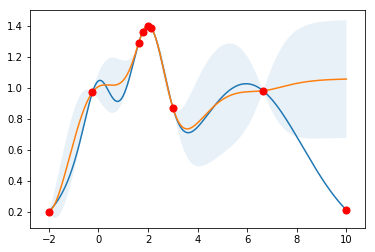

In [64]:
bo = BayesianOptimization(
    f=f,
    pbounds={"x": (-2, 10)},
    verbose=0,
    random_state=1,
)
bo.maximize(n_iter=4, acq="ucb", kappa=1.0)

plot_bo(f, bo)

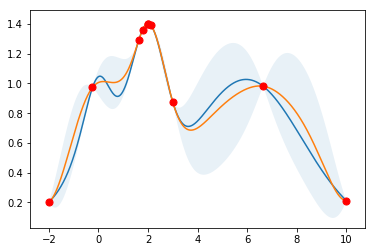

In [65]:
bo = BayesianOptimization(
    f=f,
    pbounds={"x": (-2, 10)},
    verbose=0,
    random_state=1,
)
bo.maximize(n_iter=5, acq="ucb", kappa=1.0)

plot_bo(f, bo)

In [17]:
from lightgbm import LGBMClassifier
model = LGBMClassifier()
model.fit(train_x, train_y)
model.score(test_x, test_y)

0.8600929614873838

In [33]:
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats
from scipy.stats import uniform
from time import time

clf = LGBMClassifier()

# specify parameters and distributions to sample from
param_dist = {'num_leaves': list(range(2, 30)),
              'max_depth': list(range(1, 10)),
              'learning_rate': uniform(0.1, 0.3),
              'n_estimators': list(range(10,1000))}

# run randomized search
n_iter_search = 10
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search)

start = time()
random_search.fit(np.vstack([train_x, val_x]), np.hstack([train_y, val_y]), np.array([0]*10000 + [1]*5000))
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

/Users/samuelKessler/anaconda3/envs/tf2/lib/python3.6/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass groups=[0 0 0 ... 1 1 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


RandomizedSearchCV took 79.70 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.866 (std: 0.006)
Parameters: {'learning_rate': 0.23777466758976015, 'max_depth': 5, 'n_estimators': 109, 'num_leaves': 9}

Model with rank: 2
Mean validation score: 0.865 (std: 0.007)
Parameters: {'learning_rate': 0.31242177333881366, 'max_depth': 6, 'n_estimators': 318, 'num_leaves': 3}

Model with rank: 3
Mean validation score: 0.865 (std: 0.006)
Parameters: {'learning_rate': 0.14680559213273095, 'max_depth': 3, 'n_estimators': 224, 'num_leaves': 12}



In [34]:
clf = LGBMClassifier(num_leaves=9,max_depth=5, learning_rate=0.23777466758976015, n_estimators=109)
model.fit(train_x, train_y)
model.score(test_x, test_y)

0.8614209827357238

In [30]:
from sklearn.model_selection import cross_val_score

def optimize_gbm(data, targets):
    """Apply Bayesian Optimization to GBM parameters."""

    def gbm_crossval(num_leaves, max_depth, learning_rate, n_estimators):
        """GB cross validation.
        """
        clf = LGBMClassifier(
            num_leaves=int(num_leaves),
            max_depth=int(max_depth),
            learning_rate=learning_rate,
            n_estimators=int(n_estimators),
        )
        cval = cross_val_score(clf, data, targets, scoring='accuracy', cv=4)
        return cval.mean()
    
    # Set up the BO
    optimizer = BayesianOptimization(
        f=gbm_crossval,
        pbounds={
            'num_leaves': (2, 30),
            'max_depth': (1, 10),
            'learning_rate': (0.05, 0.30),
            'n_estimators': (10,1000),
        },
        random_state=1234,
        verbose=2
    )
    optimizer.maximize(n_iter=10)

    print("Final result:", optimizer.max)
    return optimizer.max

params = optimize_gbm(data=np.vstack([train_x, val_x]), targets=np.hstack([train_y, val_y]))

|   iter    |  target   | learni... | max_depth | n_esti... | num_le... |
-------------------------------------------------------------------------
|  1        |  0.8575   |  0.09788  |  6.599    |  443.4    |  23.99    |
|  2        |  0.862    |  0.245    |  3.453    |  283.7    |  24.45    |
|  3        |  0.8511   |  0.2895   |  8.883    |  364.2    |  16.03    |
|  4        |  0.8539   |  0.2209   |  7.414    |  376.5    |  17.71    |
|  5        |  0.8589   |  0.1758   |  1.124    |  775.1    |  26.71    |
|  6        |  0.8528   |  0.1808   |  1.273    |  263.6    |  28.61    |
|  7        |  0.8637   |  0.1795   |  3.441    |  291.2    |  22.22    |
|  8        |  0.8632   |  0.1468   |  10.0     |  292.0    |  5.956    |
|  9        |  0.8565   |  0.09343  |  10.0     |  311.1    |  30.0     |
|  10       |  0.8576   |  0.3      |  1.0      |  305.9    |  2.0      |
|  11       |  0.8634   |  0.1053   |  2.643    |  291.9    |  22.14    |
|  12       |  0.8572   |  0.3      | 

In [32]:
model = LGBMClassifier(num_leaves=22,max_depth=3, learning_rate=0.17952547628941506, n_estimators=291)
model.fit(train_x, train_y)
model.score(test_x, test_y)

0.8622177954847278